In [39]:
ls

BrNoSh_0160.png*  BrNoSh_0483.png*  BrSh_0355.png*    GrSh_0089.png*
BrNoSh_0161.png*  BrNoSh_0484.png*  BrSh_0356.png*    GrSh_0090.png*
BrNoSh_0162.png*  BrNoSh_0485.png*  BrSh_0357.png*    GrSh_0091.png*
BrNoSh_0163.png*  BrNoSh_0486.png*  GrNoSh_0050.png*  GrSh_0092.png*
BrNoSh_0164.png*  BrNoSh_0487.png*  GrNoSh_0051.png*  GrSh_0093.png*
BrNoSh_0165.png*  BrNoSh_0488.png*  GrNoSh_0052.png*  GrSh_0094.png*
BrNoSh_0166.png*  BrNoSh_0489.png*  GrNoSh_0053.png*  GrSh_0095.png*
BrNoSh_0167.png*  BrNoSh_0490.png*  GrNoSh_0054.png*  GrSh_0096.png*
BrNoSh_0168.png*  BrNoSh_0491.png*  GrNoSh_0055.png*  GrSh_0097.png*
BrNoSh_0169.png*  BrNoSh_0492.png*  GrNoSh_0056.png*  GrSh_0098.png*
BrNoSh_0170.png*  BrNoSh_0493.png*  GrNoSh_0057.png*  GrSh_0099.png*
BrNoSh_0171.png*  BrNoSh_0494.png*  GrNoSh_0058.png*  GrSh_0100.png*
BrNoSh_0172.png*  BrNoSh_0495.png*  GrNoSh_0059.png*  GrSh_0101.png*
BrNoSh_0173.png*  BrNoSh_0496.png*  GrNoSh_0060.png*  GrSh_0102.png*
BrNoSh_0174.png*  BrNoSh_0497.png*

In [51]:
enc={"Br":0,"Gr":1,"Sh":0,"NoSh":1}

In [52]:
import os

In [53]:
img_names = os.listdir()

In [54]:
img_names=img_names[:-2]

In [55]:
#img_names_sorted = sorted(img_names)
N = len(img_names)

In [56]:
img_names[-2:]

['GrNoSh_0334.png', 'GrNoSh_0335.png']

In [57]:
import torch

In [58]:
x = torch.empty((N, 3, 128, 128))

In [59]:
from PIL import Image

In [60]:
import numpy as np

In [61]:
np.asarray(Image.open(img_names_sorted[3])).shape

(162, 288, 3)

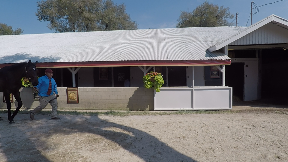

In [62]:
Image.open(img_names_sorted[40])

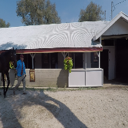

In [63]:
Image.open(img_names_sorted[40]).resize((128,128))

In [64]:
for i, filename in enumerate(img_names):
    img_as_np=np.asarray((Image.open(filename).resize((128,128))))
    img_as_np = np.swapaxes(img_as_np,2,0)
    x[i] = torch.as_tensor(img_as_np)

In [65]:
torch.save(x,"x.pt")

In [67]:
label=[]
cf=[]
for i in img_names:
    info,_=i.split('_')
    color=info[:2]
    sh=info[2:]
    label.append(enc[color])
    cf.append(enc[sh])

In [72]:
len(cf)

1291

In [75]:
sum(cf)

627

In [76]:
len(label)

1291

In [77]:
sum(label)

642

In [79]:
label_tensor=torch.from_numpy(np.asarray(label))

In [80]:
cf_tensor=torch.from_numpy(np.asarray(cf))

In [81]:
torch.save(label_tensor,'y.pt')

In [83]:
torch.save(cf_tensor,'cf.pt')